In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import scipy
from matplotlib import pyplot as plt
print ("Imported all libraries successfully...")


Imported all libraries successfully...


Import all necessary libraries to run the code.

In [4]:
url = "https://en.wikipedia.org/wiki/2023_NFL_Draft"
nfl_draft = pd.read_html(url, match = "Rnd.")
nfl_draft[0]
nfl_draft_df = pd.DataFrame(nfl_draft[0])
nfl_draft_df

# Convert df into csv file
nfl_draft_df.to_csv("draft_picks.csv")
from google.colab import files
#files.download("draft_picks.csv")
nfl_draft_df


,Unnamed: 0,Rnd.,Pick No.,NFL team,Player,Pos.,College,Conf.,Notes
0,NaN,1,1.0,Carolina Panthers,Bryce Young,QB,Alabama,SEC,from Chicago[R1 - 1]
1,NaN,1,2.0,Houston Texans,C. J. Stroud,QB,Ohio State,Big Ten,NaN
2,NaN,1,3.0,Houston Texans,Will Anderson Jr.,LB,Alabama,SEC,from Arizona[R1 - 2]
3,NaN,1,4.0,Indianapolis Colts,Anthony Richardson,QB,Florida,SEC,NaN
4,NaN,1,5.0,Seattle Seahawks,Devon Witherspoon,CB,Illinois,Big Ten,from Denver[R1 - 3]
...,...,...,...,...,...,...,...,...,...
256,NaN,7*,255.0,San Francisco 49ers,Jalen Graham,OLB,Purdue,Big Ten,NaN
257,NaN,7*,256.0,Green Bay Packers,Grant DuBose,WR,Charlotte,C-USA,NaN
258,NaN,7*,257.0,Denver Broncos,Alex Forsyth,C,Oregon,Pac-12,from New Orleans[R7 - 21]
259,NaN,7^,258.0,Chicago Bears,Kendall Williamson,CB,Stanford,Pac-12,NaN


Scrape the wikipedia website to derive the table containing all the 2023 NFL Draft picks with all the columns included ("Rnd.", "Pick No.", "NFL Team", "Player", "Pos.", "College", "Conf.", "Notes"). This table is the raw information from the website without any cleaning or sorting conducted.

In [5]:
nfl_draft_clean = pd.DataFrame()

# Create new df with specific columns
nfl_draft_clean['Round'] = nfl_draft_df['Rnd.']
nfl_draft_clean['Pick #'] = nfl_draft_df['Pick No.']
nfl_draft_clean['NFL Team'] = nfl_draft_df['NFL team']
nfl_draft_clean['Player Name'] = nfl_draft_df['Player']
nfl_draft_clean['Position'] = nfl_draft_df['Pos.']
nfl_draft_clean['College'] = nfl_draft_df['College']
nfl_draft_clean["Round"].replace

# Convert new df into csv file
nfl_draft_clean.to_csv("NFL_draft_clean.csv")
from google.colab import files
#files.download("NFL_draft_clean.csv")
nfl_draft_clean

,Round,Pick #,NFL Team,Player Name,Position,College
0,1,1.0,Carolina Panthers,Bryce Young,QB,Alabama
1,1,2.0,Houston Texans,C. J. Stroud,QB,Ohio State
2,1,3.0,Houston Texans,Will Anderson Jr.,LB,Alabama
3,1,4.0,Indianapolis Colts,Anthony Richardson,QB,Florida
4,1,5.0,Seattle Seahawks,Devon Witherspoon,CB,Illinois
...,...,...,...,...,...,...
256,7*,255.0,San Francisco 49ers,Jalen Graham,OLB,Purdue
257,7*,256.0,Green Bay Packers,Grant DuBose,WR,Charlotte
258,7*,257.0,Denver Broncos,Alex Forsyth,C,Oregon
259,7^,258.0,Chicago Bears,Kendall Williamson,CB,Stanford


This section of code cleans the initial table of raw information from the site, which is conducted by renaming specific columns ("Rnd." to "Round", "Pick No." to "Pick #", "NFL Team" remains the same, "Player" to "Player Name", "Pos." to "Position", and "College" remains the same). While renaming these columns, I chose to not include the conference of the college and the notes columns to make the data look more presentable and discard any unneeded information for the graphs in the future code.

In [6]:
nfl_draft_clean["# of Picks"] = 1
number_of_picks_per_team = nfl_draft_clean.groupby(["NFL Team"])["# of Picks"].sum().to_frame()
number_of_picks_per_college = nfl_draft_clean.groupby(["College"])["# of Picks"].sum().to_frame()
number_of_picks_per_college

,# of Picks
College,
Alabama,10
Appalachian State,2
Arizona State,1
Arkansas,2
Auburn,5
...,...
Western Kentucky,1
Western Michigan,1
William & Mary,1


In [7]:
number_of_picks_per_team

,# of Picks
NFL Team,
Arizona Cardinals,9
Atlanta Falcons,6
Baltimore Ravens,6
Buffalo Bills,6
Carolina Panthers,5
Chicago Bears,10
Cincinnati Bengals,8
Cleveland Browns,7
Dallas Cowboys,8


This section of code takes two of the columns ("NFL Team" and "College") and counts the number of picks each NFL Team and College had in the 2023 NFL Draft. This information is then inputted into seperate data frames called `number_of_picks_by_team` and `number_of_picks_by_college`.

In [8]:
number_of_picks_per_team_sorted = number_of_picks_per_team["# of Picks"].sort_values(ascending=False).to_frame().reset_index()
number_of_picks_per_team_sorted

,NFL Team,# of Picks
0,Los Angeles Rams,14
1,Green Bay Packers,13
2,Jacksonville Jaguars,13
3,New England Patriots,12
4,Indianapolis Colts,12
5,Seattle Seahawks,10
6,Chicago Bears,10
7,Houston Texans,10
8,Arizona Cardinals,9
9,San Francisco 49ers,9


In [9]:
number_of_picks_per_college_sorted = number_of_picks_per_college["# of Picks"].sort_values(ascending=False).reset_index()
number_of_picks_per_college_sorted

,College,# of Picks
0,Alabama,10
1,Georgia,10
2,Michigan,9
3,TCU,8
4,Pittsburgh,6
...,...,...
92,Louisiana,1
93,California,1
94,NC State,1
95,Southern Miss,1


After deriving two data frames for the NFL Teams and College picks, I chose to sort them by descending values so that for my graphs I can target the teams with the most picks in the draft (`.sort_values(ascending=False)`). While sorting these values, I also needed to reset the index so that I can use the rows with the most number of picks for the graphs using `.reset_index()`.

Text(0.5, 1.0, 'NFL Team vs. Number of Picks in 2023 NFL Draft')

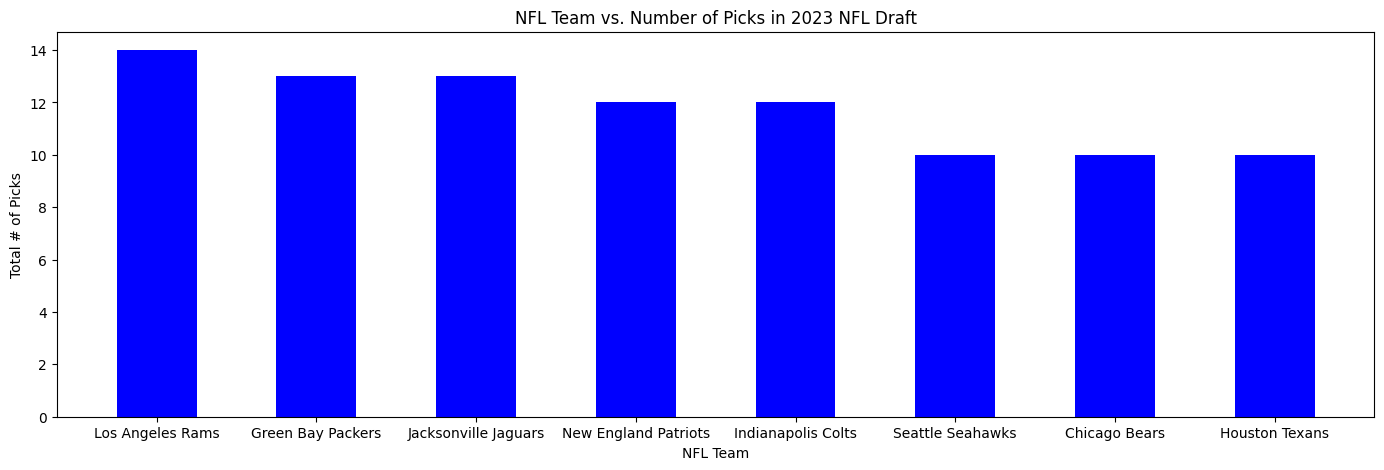

In [11]:
first_eight_rows = [0,1,2,3,4,5,6,7]

column1 = number_of_picks_per_team_sorted['NFL Team']
column2 = number_of_picks_per_team_sorted["# of Picks"]

selected_Team = []
selected_Picks = []

for row_id in first_eight_rows:
    selected_Team.append(column1[row_id])
    selected_Picks.append(column2[row_id])

# Now plot our bar graph
plt.figure(figsize=(17,5))
plt.bar(selected_Team, selected_Picks, color ='blue', width = .5)

# Now add axis labels with units
plt.xlabel("NFL Team")
plt.ylabel("Total # of Picks")

# We can add a title too
plt.title("NFL Team vs. Number of Picks in 2023 NFL Draft")

In this section of code, I created variables for the two columns, which will be the x and y axis of the bar graph. I used the new dataframe made in the last step and chose the top eight NFL Teams with the most picks in the 2023 NFL Draft by creating the variable `first_eight_rows`. I then used the `.plt` to create and adjust the bar graph with x and y axis titles as well as an overall graph title.

This graph works to present the teams in the NFL with the most picks in the 2023 draft. This can help us understand which types of teams (strength, location, history) are getting the most picks. Usually the worse teams from the previous season get the early picks, and as the draft goes on, more teams have draft picks based on trades and compensation. Each team starts the draft with seven picks (one per round), and make changes to gain more picks.

Text(0.5, 1.0, 'College vs. Number of Picks in 2023 NFL Draft')

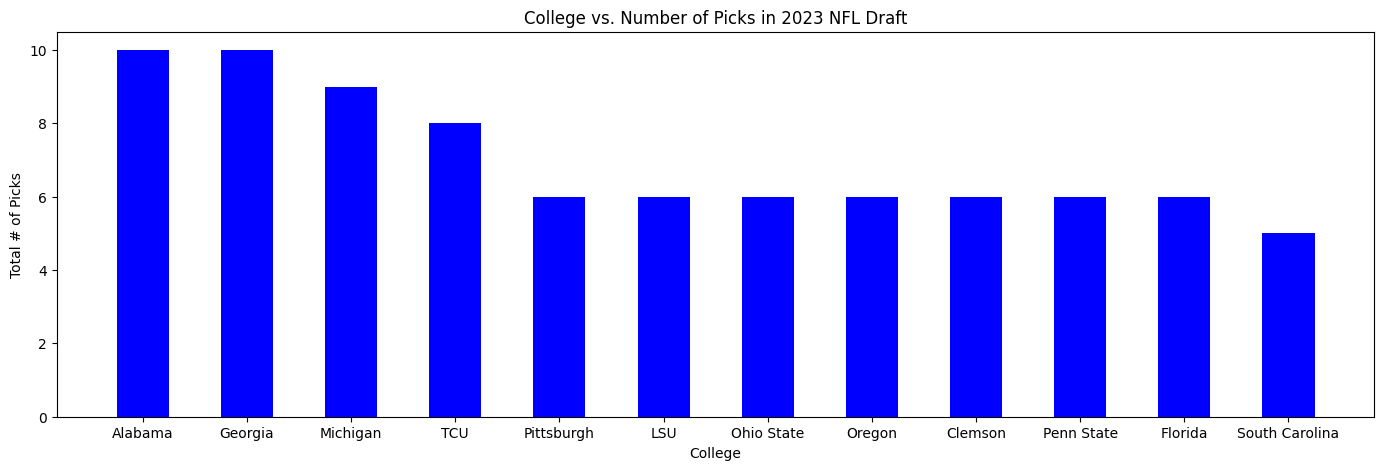

In [12]:
first_twelve_rows = [0,1,2,3,4,5,6,7,8,9,10,11]

column3 = number_of_picks_per_college_sorted['College']
column4 = number_of_picks_per_college_sorted["# of Picks"]

selected_College = []
selected_Picks = []

for row_id in first_twelve_rows:
    selected_College.append(column3[row_id])
    selected_Picks.append(column4[row_id])

# Now plot our bar graph
plt.figure(figsize=(17,5))
plt.bar(selected_College, selected_Picks, color ='blue', width = .5)

# Now add axis labels with units
plt.xlabel("College")
plt.ylabel("Total # of Picks")

# We can add a title too
plt.title("College vs. Number of Picks in 2023 NFL Draft")

In this section of code, which is very similar to the previous section, I also created two columns representing the x and y axis of the bar graph. I used the `number_of_picks_per_college_sorted` data frame with the two columns ("College" and "# of Picks") and chose the top twelve rows with the variable `first_twelve_rows`. I used `.plt` again to create and adjust the bar graph.

This graph shows us which colleges in the NCAA sent the most players to the NFL in the 2023 draft. This can be used by high schoolers and high school programs to target schools that have the highest rate of sending players to the next level (NFL). Teams that normally send the most players include schools such as Alabama, Michigan, and Georgia which is presented in the 2023 NFL Draft as well.